In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

In [58]:
x1 = [3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 
      7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817]

x2 = [2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 
      4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


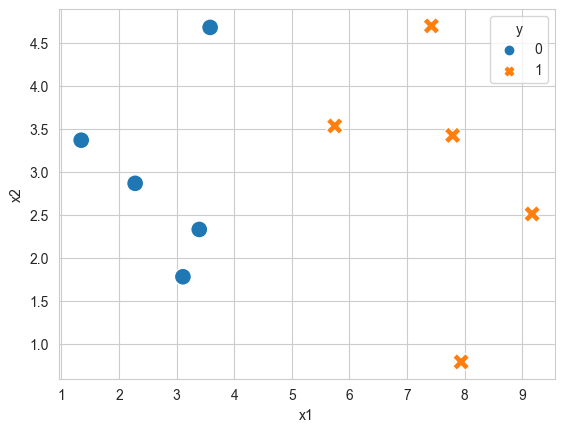

In [7]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

In [8]:
new_x1 = 8.093607318
new_x2 = 3.365731514

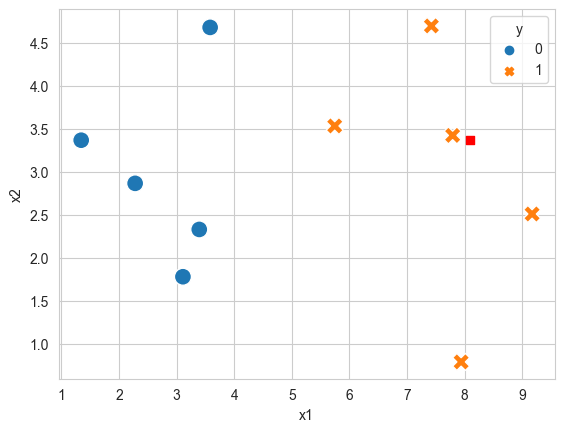

In [10]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.scatter(x=new_x1, y=new_x2, color='r', marker=',')
plt.show()

In [59]:
df['x1-new_x1'] = np.square(df['x1'] - new_x1)
df['x2-new_x2'] = np.square(df['x2'] - new_x2)
df['Sum'] = df['x1-new_x1'] + df['x2-new_x2']
df['Distance'] = np.sqrt(df['Sum'])
df

,x1,x2,y,x1-new_x1,x2-new_x2,Sum,Distance
0,3.393533,2.331273,0,22.090697,1.070104,23.160800,4.812567
1,3.110073,1.781540,0,24.835609,2.509664,27.345273,5.229271
2,1.343809,3.368361,0,45.559780,0.000007,45.559787,6.749799
3,3.582294,4.679179,0,20.351947,1.725145,22.077092,4.698627
4,2.280362,2.866990,0,33.793816,0.248743,34.042559,5.834600
5,7.423437,4.696523,1,0.449128,1.771006,2.220134,1.490011
6,5.745052,3.533990,1,5.515712,0.028311,5.544023,2.354575
7,9.172169,2.511101,1,1.163294,0.730393,1.893688,1.376113
8,7.792783,3.424089,1,0.090495,0.003406,0.093901,0.306432
9,7.939821,0.791637,1,0.023650,6.625961,6.649612,2.578684


In [13]:
k = 3

In [60]:
df = df.sort_values(by=['Distance'], ascending=True)
df = df.reset_index()

In [62]:
df['Neighbor'] = 'NO'

In [64]:
for i in range(k):
    df.loc[i, 'Neighbor'] = 'YES'

In [65]:
df

,index,x1,x2,y,x1-new_x1,x2-new_x2,Sum,Distance,Neighbor
0,8,7.792783,3.424089,1,0.090495,0.003406,0.093901,0.306432,YES
1,7,9.172169,2.511101,1,1.163294,0.730393,1.893688,1.376113,YES
2,5,7.423437,4.696523,1,0.449128,1.771006,2.220134,1.490011,YES
3,6,5.745052,3.533990,1,5.515712,0.028311,5.544023,2.354575,NO
4,9,7.939821,0.791637,1,0.023650,6.625961,6.649612,2.578684,NO
5,3,3.582294,4.679179,0,20.351947,1.725145,22.077092,4.698627,NO
6,0,3.393533,2.331273,0,22.090697,1.070104,23.160800,4.812567,NO
7,1,3.110073,1.781540,0,24.835609,2.509664,27.345273,5.229271,NO
8,4,2.280362,2.866990,0,33.793816,0.248743,34.042559,5.834600,NO
9,2,1.343809,3.368361,0,45.559780,0.000007,45.559787,6.749799,NO


In [67]:
df['y'][df['Neighbor'] == 'YES']

0    1
1    1
2    1
Name: y, dtype: int64

In [70]:
import statistics
statistics.mode(df['y'][df['Neighbor'] == 'YES'])

1